In [27]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from datetime import datetime


In [28]:
austin_df = pd.read_csv('airbnb_listings_austin.csv')
austin_df


,id,listing_url,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy
0,72635,https://www.airbnb.com/rooms/72635,"3 Private Bedrooms, SW Austin",Conveniently located 10-15 from downtown in SW...,"We have three spare bedrooms, each with a quee...",Conveniently located 10-15 from downtown in SW...,none,Location and convenience are key. Easy access...,NaN,Unfortunately there is no convenient public tr...,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate
1,5386323,https://www.airbnb.com/rooms/5386323,Cricket Trailer,Rent this cool concept trailer that has everyt...,Rental arrangements for this trailer allows yo...,Rent this cool concept trailer that has everyt...,none,We're talking about wherever you'd like in the...,NaN,"Bike, Bus, Metrorail, etc. you name it we've g...",...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate
2,8826517,https://www.airbnb.com/rooms/8826517,Private room 1 in South Austin,"Upstairs, private, 12ft x 13 1/2ft room. Priv...",NaN,"Upstairs, private, 12ft x 13 1/2ft room. Priv...",none,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible
3,8828616,https://www.airbnb.com/rooms/8828616,Private room 2 in South Austin,"Upstairs, private, 11ft x 13 1/2ft room. Priv...",NaN,"Upstairs, private, 11ft x 13 1/2ft room. Priv...",none,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible
4,8536913,https://www.airbnb.com/rooms/8536913,Brand-New 3BR Austin Home,Brand-new 3BR/2BA Austin home with landscaped ...,Feel instantly at home at our brand new 3BR/2B...,Brand-new 3BR/2BA Austin home with landscaped ...,none,Entertainment and activities are plentiful her...,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5830,6063670,https://www.airbnb.com/rooms/6063670,Austin's Downtown Garden Suite,Enjoy being literally steps from everything th...,If you are looking for the perfect suite in th...,Enjoy being literally steps from everything th...,none,I love that the downtown neighborhood is so vi...,If you are interested in hosting an even large...,In addition to the Airport Flyer that I alread...,...,9,100.0,10.0,10.0,10.0,10.0,10.0,9.0,f,strict
5831,8422925,https://www.airbnb.com/rooms/8422925,Two beds in Downtown Austin!,Prime location for the Austin Convention Cente...,"Located in the heart of downtown, this room co...",Prime location for the Austin Convention Cente...,none,This truly is in the middle of everything goin...,NaN,Buses leave from across the street (including ...,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate
5832,3345881,https://www.airbnb.com/rooms/3345881,Casa Romántica en Picos de Europa,Axtur: Picos de Europa. Desfiladero del Sella ...,Una casa excepcional en un paisaje excepcional...,Una casa excepcional en un paisaje excepcional...,none,"Pueblecito asturiano, con muy pocos vecinos, d...",Paisaje y tranquilidad.,En Coche,...,1,100.0,8.0,10.0,10.0,10.0,10.0,8.0,t,strict
5833,8954997,https://www.airbnb.com/rooms/8954997,Living room with bed,Living room with bed have bathroom.,NaN,Living room with bed have bathroom.,none,NaN,NaN,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible


In [29]:
austin_df_temp = austin_df.drop(columns = ["listing_url", 
                                         "summary",
                                         "description",
                                         "notes", 
                                         "transit", 
                                         "neighborhood_overview", 
                                         "host_about", 
                                         "host_is_superhost", 
                                         "host_listings_count", 
                                         "host_has_profile_pic", 
                                         "host_identity_verified", 
                                         "room_type", 
                                         "bed_type", 
                                         "guests_included", 
                                         "extra_people", 
                                         "minimum_nights", 
                                         "has_availability", 
                                         "cancellation_policy"])
austin_df_temp

,id,name,space,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,72635,"3 Private Bedrooms, SW Austin","We have three spare bedrooms, each with a quee...",none,377044,Jason & Marcie,2/4/2011,"Austin, Texas, United States",NaN,NaN,...,240,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,5386323,Cricket Trailer,Rental arrangements for this trailer allows yo...,none,27922117,Michael,2/17/2015,"Austin, Texas, United States",NaN,NaN,...,364,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
2,8826517,Private room 1 in South Austin,NaN,none,46230038,Ric,10/10/2015,"Austin, Texas, United States",NaN,NaN,...,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
3,8828616,Private room 2 in South Austin,NaN,none,46230038,Ric,10/10/2015,"Austin, Texas, United States",NaN,NaN,...,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
4,8536913,Brand-New 3BR Austin Home,Feel instantly at home at our brand new 3BR/2B...,none,31148752,Bo,4/13/2015,US,within a few hours,98%,...,358,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5830,6063670,Austin's Downtown Garden Suite,If you are looking for the perfect suite in th...,none,4929310,Ryan,2/1/2013,"Austin, Texas, United States",within a few hours,100%,...,340,9,100.0,10.0,10.0,10.0,10.0,10.0,9.0,f
5831,8422925,Two beds in Downtown Austin!,"Located in the heart of downtown, this room co...",none,44295408,Raul And Zac,9/15/2015,"Ventura, California, United States",within an hour,100%,...,316,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
5832,3345881,Casa Romántica en Picos de Europa,Una casa excepcional en un paisaje excepcional...,none,14869844,Ramon,4/29/2014,Asturias. Spain,within an hour,100%,...,364,1,100.0,8.0,10.0,10.0,10.0,10.0,8.0,t
5833,8954997,Living room with bed,NaN,none,42870454,Kalyan,8/29/2015,"Austin, Texas, United States",a few days or more,33%,...,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f


In [30]:
austin_df_temp.isna().sum() / len(austin_df_temp) * 100

id                              0.000000
name                            0.000000
space                          23.307626
experiences_offered             0.000000
host_id                         0.000000
host_name                       0.257069
host_since                      0.257069
host_location                   0.428449
host_response_time             28.414739
host_response_rate             28.414739
neighbourhood                  17.737789
city                            0.000000
property_type                   0.000000
accommodates                    0.000000
bathrooms                       0.788346
bedrooms                        0.102828
beds                            0.394173
amenities                       0.000000
square_feet                    94.824336
price                           0.000000
weekly_price                   61.833762
security_deposit               52.527849
cleaning_fee                   38.526135
availability_30                 0.000000
availability_60 

In [31]:
austin_df_temp = austin_df_temp.drop(columns = ["weekly_price", 
                                         "security_deposit", 
                                         "square_feet", 
                                         "cleaning_fee",
                                         "space"])
austin_df_temp

,id,name,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,neighbourhood,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,72635,"3 Private Bedrooms, SW Austin",none,377044,Jason & Marcie,2/4/2011,"Austin, Texas, United States",NaN,NaN,Circle C,...,240,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,5386323,Cricket Trailer,none,27922117,Michael,2/17/2015,"Austin, Texas, United States",NaN,NaN,Circle C,...,364,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
2,8826517,Private room 1 in South Austin,none,46230038,Ric,10/10/2015,"Austin, Texas, United States",NaN,NaN,NaN,...,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
3,8828616,Private room 2 in South Austin,none,46230038,Ric,10/10/2015,"Austin, Texas, United States",NaN,NaN,NaN,...,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
4,8536913,Brand-New 3BR Austin Home,none,31148752,Bo,4/13/2015,US,within a few hours,98%,NaN,...,358,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5830,6063670,Austin's Downtown Garden Suite,none,4929310,Ryan,2/1/2013,"Austin, Texas, United States",within a few hours,100%,Downtown,...,340,9,100.0,10.0,10.0,10.0,10.0,10.0,9.0,f
5831,8422925,Two beds in Downtown Austin!,none,44295408,Raul And Zac,9/15/2015,"Ventura, California, United States",within an hour,100%,Downtown,...,316,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
5832,3345881,Casa Romántica en Picos de Europa,none,14869844,Ramon,4/29/2014,Asturias. Spain,within an hour,100%,NaN,...,364,1,100.0,8.0,10.0,10.0,10.0,10.0,8.0,t
5833,8954997,Living room with bed,none,42870454,Kalyan,8/29/2015,"Austin, Texas, United States",a few days or more,33%,NaN,...,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f


In [32]:
austin_df_temp.isna().sum() / len(austin_df_temp) * 100

id                              0.000000
name                            0.000000
experiences_offered             0.000000
host_id                         0.000000
host_name                       0.257069
host_since                      0.257069
host_location                   0.428449
host_response_time             28.414739
host_response_rate             28.414739
neighbourhood                  17.737789
city                            0.000000
property_type                   0.000000
accommodates                    0.000000
bathrooms                       0.788346
bedrooms                        0.102828
beds                            0.394173
amenities                       0.000000
price                           0.000000
availability_30                 0.000000
availability_60                 0.000000
availability_90                 0.000000
availability_365                0.000000
number_of_reviews               0.000000
review_scores_rating           35.064267
review_scores_ac

In [33]:
austin_df_fin = austin_df_temp.dropna()
austin_df_fin

,id,name,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,neighbourhood,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
7,8486890,Cozy private room 15 mins frm dtwn,none,11448084,Prerna,1/19/2014,"Austin, Texas, United States",within an hour,100%,Circle C,...,312,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t
12,2989616,South Austin Private room2,none,7567467,Chalu,7/18/2013,"Austin, Texas, United States",within an hour,97%,Circle C,...,360,4,100.0,9.0,10.0,10.0,10.0,10.0,10.0,f
13,2853144,South Austin Private room,none,7567467,Chalu,7/18/2013,"Austin, Texas, United States",within an hour,97%,Circle C,...,364,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
14,330710,Austin Zen Stay / Longhorn Room 10,none,1427814,Andrea,11/21/2011,"Austin, Texas, United States",within a few hours,100%,St. Johns,...,365,14,99.0,10.0,10.0,10.0,10.0,9.0,9.0,f
35,8098091,Beautiful Upscale Townhome/Apt,none,42762241,Abraham,8/28/2015,"Austin, Texas, United States",within a few hours,80%,Steiner Ranch,...,365,2,100.0,9.0,10.0,9.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5824,7937440,Lux 2bd/2ba - 2 min walk to 6th St,none,41856779,Brad,8/18/2015,"Austin, Texas, United States",within a few hours,89%,Downtown,...,334,4,95.0,9.0,10.0,10.0,10.0,10.0,10.0,f
5826,3440546,1BR Amazing Downtown Austin Condo,none,4641823,Erica,1/9/2013,"Austin, Texas, United States",within a few hours,100%,Downtown,...,352,12,85.0,9.0,9.0,9.0,9.0,10.0,8.0,f
5827,2459536,Welcome to The Railyard! 4/3 condo!,none,579290,Jay,5/11/2011,"Austin, Texas, United States",within a few hours,87%,Downtown,...,343,13,94.0,9.0,9.0,10.0,9.0,10.0,9.0,f
5829,8054795,The Downtown TripShack,none,1710302,Lindsay,2/6/2012,"Austin, Texas, United States",within a few hours,95%,Downtown,...,342,13,88.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [34]:
duplicates = austin_df_fin.duplicated()
duplicates

7       False
12      False
13      False
14      False
35      False
        ...  
5824    False
5826    False
5827    False
5829    False
5830    False
Length: 2780, dtype: bool

In [35]:
# duplicate checking
austin_df_clean = austin_df_fin.drop_duplicates()

duplicates_check = austin_df_clean.duplicated()

duplicates_count = duplicates_check.sum()

duplicates_count

0

In [36]:
# austin_df_clean.to_csv('cleaned_austin_data.csv')

In [37]:
austin_df_clean = austin_df_clean.drop(columns = ["name",
                                                  "host_name", "host_location", "experiences_offered", "neighbourhood", "city", "property_type", "amenities"])
austin_df_clean

,id,host_id,host_since,host_response_time,host_response_rate,accommodates,bathrooms,bedrooms,beds,price,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
7,8486890,11448084,1/19/2014,within an hour,100%,2,1.0,1.0,1.0,$40.00,...,312,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t
12,2989616,7567467,7/18/2013,within an hour,97%,2,1.0,1.0,1.0,$49.00,...,360,4,100.0,9.0,10.0,10.0,10.0,10.0,10.0,f
13,2853144,7567467,7/18/2013,within an hour,97%,2,1.0,1.0,1.0,$50.00,...,364,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
14,330710,1427814,11/21/2011,within a few hours,100%,2,1.0,1.0,1.0,$55.00,...,365,14,99.0,10.0,10.0,10.0,10.0,9.0,9.0,f
35,8098091,42762241,8/28/2015,within a few hours,80%,4,1.0,1.0,1.0,$59.00,...,365,2,100.0,9.0,10.0,9.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5824,7937440,41856779,8/18/2015,within a few hours,89%,6,2.0,2.0,2.0,$350.00,...,334,4,95.0,9.0,10.0,10.0,10.0,10.0,10.0,f
5826,3440546,4641823,1/9/2013,within a few hours,100%,4,1.0,1.0,1.0,$250.00,...,352,12,85.0,9.0,9.0,9.0,9.0,10.0,8.0,f
5827,2459536,579290,5/11/2011,within a few hours,87%,8,3.0,4.0,4.0,$500.00,...,343,13,94.0,9.0,9.0,10.0,9.0,10.0,9.0,f
5829,8054795,1710302,2/6/2012,within a few hours,95%,4,1.0,1.0,2.0,$125.00,...,342,13,88.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [38]:
# put non-numeric variables to dummies
austin_df_clean["instant_bookable"] = austin_df_clean["instant_bookable"].apply(lambda x: 1 if x == 't' else 0)

austin_df_clean

,id,host_id,host_since,host_response_time,host_response_rate,accommodates,bathrooms,bedrooms,beds,price,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
7,8486890,11448084,1/19/2014,within an hour,100%,2,1.0,1.0,1.0,$40.00,...,312,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1
12,2989616,7567467,7/18/2013,within an hour,97%,2,1.0,1.0,1.0,$49.00,...,360,4,100.0,9.0,10.0,10.0,10.0,10.0,10.0,0
13,2853144,7567467,7/18/2013,within an hour,97%,2,1.0,1.0,1.0,$50.00,...,364,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0
14,330710,1427814,11/21/2011,within a few hours,100%,2,1.0,1.0,1.0,$55.00,...,365,14,99.0,10.0,10.0,10.0,10.0,9.0,9.0,0
35,8098091,42762241,8/28/2015,within a few hours,80%,4,1.0,1.0,1.0,$59.00,...,365,2,100.0,9.0,10.0,9.0,10.0,10.0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5824,7937440,41856779,8/18/2015,within a few hours,89%,6,2.0,2.0,2.0,$350.00,...,334,4,95.0,9.0,10.0,10.0,10.0,10.0,10.0,0
5826,3440546,4641823,1/9/2013,within a few hours,100%,4,1.0,1.0,1.0,$250.00,...,352,12,85.0,9.0,9.0,9.0,9.0,10.0,8.0,0
5827,2459536,579290,5/11/2011,within a few hours,87%,8,3.0,4.0,4.0,$500.00,...,343,13,94.0,9.0,9.0,10.0,9.0,10.0,9.0,0
5829,8054795,1710302,2/6/2012,within a few hours,95%,4,1.0,1.0,2.0,$125.00,...,342,13,88.0,10.0,10.0,10.0,10.0,10.0,10.0,0


In [39]:
# Assuming 'austin_df_clean' is your DataFrame which is already loaded

# Apply a lambda function to the 'host_response_time' column to convert the strings to integers
austin_df_clean['host_response_time'] = austin_df_clean['host_response_time'].apply(
    lambda x: 0 if x == 'within an hour' else 
              1 if x == 'within a few hours' else 
              2 if x == 'within a day' else 
              3 if x == 'a few days or more' else -1  # -1 or any other value for unexpected cases
)


austin_df_clean


,id,host_id,host_since,host_response_time,host_response_rate,accommodates,bathrooms,bedrooms,beds,price,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
7,8486890,11448084,1/19/2014,0,100%,2,1.0,1.0,1.0,$40.00,...,312,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1
12,2989616,7567467,7/18/2013,0,97%,2,1.0,1.0,1.0,$49.00,...,360,4,100.0,9.0,10.0,10.0,10.0,10.0,10.0,0
13,2853144,7567467,7/18/2013,0,97%,2,1.0,1.0,1.0,$50.00,...,364,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0
14,330710,1427814,11/21/2011,1,100%,2,1.0,1.0,1.0,$55.00,...,365,14,99.0,10.0,10.0,10.0,10.0,9.0,9.0,0
35,8098091,42762241,8/28/2015,1,80%,4,1.0,1.0,1.0,$59.00,...,365,2,100.0,9.0,10.0,9.0,10.0,10.0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5824,7937440,41856779,8/18/2015,1,89%,6,2.0,2.0,2.0,$350.00,...,334,4,95.0,9.0,10.0,10.0,10.0,10.0,10.0,0
5826,3440546,4641823,1/9/2013,1,100%,4,1.0,1.0,1.0,$250.00,...,352,12,85.0,9.0,9.0,9.0,9.0,10.0,8.0,0
5827,2459536,579290,5/11/2011,1,87%,8,3.0,4.0,4.0,$500.00,...,343,13,94.0,9.0,9.0,10.0,9.0,10.0,9.0,0
5829,8054795,1710302,2/6/2012,1,95%,4,1.0,1.0,2.0,$125.00,...,342,13,88.0,10.0,10.0,10.0,10.0,10.0,10.0,0


In [40]:
austin_df_clean['host_since'] = pd.to_datetime(austin_df_clean['host_since'], format='%m/%d/%Y')

target_date = pd.Timestamp('2024-12-01')

austin_df_clean['operating_days'] = (target_date - austin_df_clean['host_since']).dt.days

host_operating_comparison = austin_df_clean[['host_since', 'operating_days']]

austin_df_clean

,id,host_id,host_since,host_response_time,host_response_rate,accommodates,bathrooms,bedrooms,beds,price,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,operating_days
7,8486890,11448084,2014-01-19,0,100%,2,1.0,1.0,1.0,$40.00,...,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,3969
12,2989616,7567467,2013-07-18,0,97%,2,1.0,1.0,1.0,$49.00,...,4,100.0,9.0,10.0,10.0,10.0,10.0,10.0,0,4154
13,2853144,7567467,2013-07-18,0,97%,2,1.0,1.0,1.0,$50.00,...,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,4154
14,330710,1427814,2011-11-21,1,100%,2,1.0,1.0,1.0,$55.00,...,14,99.0,10.0,10.0,10.0,10.0,9.0,9.0,0,4759
35,8098091,42762241,2015-08-28,1,80%,4,1.0,1.0,1.0,$59.00,...,2,100.0,9.0,10.0,9.0,10.0,10.0,10.0,0,3383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5824,7937440,41856779,2015-08-18,1,89%,6,2.0,2.0,2.0,$350.00,...,4,95.0,9.0,10.0,10.0,10.0,10.0,10.0,0,3393
5826,3440546,4641823,2013-01-09,1,100%,4,1.0,1.0,1.0,$250.00,...,12,85.0,9.0,9.0,9.0,9.0,10.0,8.0,0,4344
5827,2459536,579290,2011-05-11,1,87%,8,3.0,4.0,4.0,$500.00,...,13,94.0,9.0,9.0,10.0,9.0,10.0,9.0,0,4953
5829,8054795,1710302,2012-02-06,1,95%,4,1.0,1.0,2.0,$125.00,...,13,88.0,10.0,10.0,10.0,10.0,10.0,10.0,0,4682


In [41]:
austin_df_clean = austin_df_clean.drop(columns = ["host_since", "id", "host_id"])
austin_df_clean

,host_response_time,host_response_rate,accommodates,bathrooms,bedrooms,beds,price,availability_30,availability_60,availability_90,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,operating_days
7,0,100%,2,1.0,1.0,1.0,$40.00,16,16,37,...,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,3969
12,0,97%,2,1.0,1.0,1.0,$49.00,25,55,85,...,4,100.0,9.0,10.0,10.0,10.0,10.0,10.0,0,4154
13,0,97%,2,1.0,1.0,1.0,$50.00,29,59,89,...,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,4154
14,1,100%,2,1.0,1.0,1.0,$55.00,30,60,90,...,14,99.0,10.0,10.0,10.0,10.0,9.0,9.0,0,4759
35,1,80%,4,1.0,1.0,1.0,$59.00,30,60,90,...,2,100.0,9.0,10.0,9.0,10.0,10.0,10.0,0,3383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5824,1,89%,6,2.0,2.0,2.0,$350.00,8,32,62,...,4,95.0,9.0,10.0,10.0,10.0,10.0,10.0,0,3393
5826,1,100%,4,1.0,1.0,1.0,$250.00,20,50,80,...,12,85.0,9.0,9.0,9.0,9.0,10.0,8.0,0,4344
5827,1,87%,8,3.0,4.0,4.0,$500.00,19,49,76,...,13,94.0,9.0,9.0,10.0,9.0,10.0,9.0,0,4953
5829,1,95%,4,1.0,1.0,2.0,$125.00,17,43,73,...,13,88.0,10.0,10.0,10.0,10.0,10.0,10.0,0,4682


In [42]:
# Assuming 'austin_df_clean' is your DataFrame which is already loaded

# Remove the percent sign, convert the column to float, and round to one decimal place
austin_df_clean['host_response_rate'] = austin_df_clean['host_response_rate'].str.replace('%', '').astype(float)
austin_df_clean['host_response_rate'] = austin_df_clean['host_response_rate'].round(1)

# Rename the column to 'host_response_rate(%)'
austin_df_clean = austin_df_clean.rename(columns={'host_response_rate': 'host_response_rate(%)'})

austin_df_clean

,host_response_time,host_response_rate(%),accommodates,bathrooms,bedrooms,beds,price,availability_30,availability_60,availability_90,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,operating_days
7,0,100.0,2,1.0,1.0,1.0,$40.00,16,16,37,...,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,3969
12,0,97.0,2,1.0,1.0,1.0,$49.00,25,55,85,...,4,100.0,9.0,10.0,10.0,10.0,10.0,10.0,0,4154
13,0,97.0,2,1.0,1.0,1.0,$50.00,29,59,89,...,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,4154
14,1,100.0,2,1.0,1.0,1.0,$55.00,30,60,90,...,14,99.0,10.0,10.0,10.0,10.0,9.0,9.0,0,4759
35,1,80.0,4,1.0,1.0,1.0,$59.00,30,60,90,...,2,100.0,9.0,10.0,9.0,10.0,10.0,10.0,0,3383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5824,1,89.0,6,2.0,2.0,2.0,$350.00,8,32,62,...,4,95.0,9.0,10.0,10.0,10.0,10.0,10.0,0,3393
5826,1,100.0,4,1.0,1.0,1.0,$250.00,20,50,80,...,12,85.0,9.0,9.0,9.0,9.0,10.0,8.0,0,4344
5827,1,87.0,8,3.0,4.0,4.0,$500.00,19,49,76,...,13,94.0,9.0,9.0,10.0,9.0,10.0,9.0,0,4953
5829,1,95.0,4,1.0,1.0,2.0,$125.00,17,43,73,...,13,88.0,10.0,10.0,10.0,10.0,10.0,10.0,0,4682


In [43]:
# Assuming 'austin_df_clean' is your DataFrame which is already loaded

# Remove the dollar sign, convert the column to float, and ensure two decimal places
austin_df_clean['price'] = austin_df_clean['price'].str.replace('$', '').str.replace(',', '').astype(float).round(2)

austin_df_clean


,host_response_time,host_response_rate(%),accommodates,bathrooms,bedrooms,beds,price,availability_30,availability_60,availability_90,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,operating_days
7,0,100.0,2,1.0,1.0,1.0,40.0,16,16,37,...,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,3969
12,0,97.0,2,1.0,1.0,1.0,49.0,25,55,85,...,4,100.0,9.0,10.0,10.0,10.0,10.0,10.0,0,4154
13,0,97.0,2,1.0,1.0,1.0,50.0,29,59,89,...,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,4154
14,1,100.0,2,1.0,1.0,1.0,55.0,30,60,90,...,14,99.0,10.0,10.0,10.0,10.0,9.0,9.0,0,4759
35,1,80.0,4,1.0,1.0,1.0,59.0,30,60,90,...,2,100.0,9.0,10.0,9.0,10.0,10.0,10.0,0,3383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5824,1,89.0,6,2.0,2.0,2.0,350.0,8,32,62,...,4,95.0,9.0,10.0,10.0,10.0,10.0,10.0,0,3393
5826,1,100.0,4,1.0,1.0,1.0,250.0,20,50,80,...,12,85.0,9.0,9.0,9.0,9.0,10.0,8.0,0,4344
5827,1,87.0,8,3.0,4.0,4.0,500.0,19,49,76,...,13,94.0,9.0,9.0,10.0,9.0,10.0,9.0,0,4953
5829,1,95.0,4,1.0,1.0,2.0,125.0,17,43,73,...,13,88.0,10.0,10.0,10.0,10.0,10.0,10.0,0,4682


In [44]:
# austin_df_clean.to_csv('cleaned_austin_data_2.csv')

# Standardize Data using StandardScaler

In [45]:
#Standardize Data
dfcolumns = austin_df_clean.columns.values.tolist()

scaler = StandardScaler()

df_scaled = scaler.fit_transform(austin_df_clean.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=dfcolumns)


df_scaled.head()

,host_response_time,host_response_rate(%),accommodates,bathrooms,bedrooms,beds,price,availability_30,availability_60,availability_90,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,operating_days
0,-0.899417,0.467297,-0.891556,-0.614751,-0.628375,-0.742815,-0.761579,-0.056964,-1.017064,-0.738006,...,-0.534886,0.671737,0.477664,0.521737,0.298269,0.291556,0.649546,0.670397,2.753225,-0.467662
1,-0.899417,0.232452,-0.891556,-0.614751,-0.628375,-0.742815,-0.723096,0.771662,0.852079,0.828866,...,-0.473651,0.671737,-1.006030,0.521737,0.298269,0.291556,0.649546,0.670397,-0.363210,-0.120064
2,-0.899417,0.232452,-0.891556,-0.614751,-0.628375,-0.742815,-0.718820,1.139940,1.043786,0.959439,...,-0.381800,0.671737,0.477664,0.521737,0.298269,0.291556,0.649546,0.670397,-0.363210,-0.120064
3,0.343934,0.467297,-0.891556,-0.614751,-0.628375,-0.742815,-0.697441,1.232010,1.091712,0.992082,...,-0.167480,0.516144,0.477664,0.521737,0.298269,0.291556,-0.666590,-0.550103,-0.363210,1.016677
4,0.343934,-1.098339,-0.186829,-0.614751,-0.628375,-0.742815,-0.680337,1.232010,1.091712,0.992082,...,-0.534886,0.671737,-1.006030,0.521737,-1.680702,0.291556,0.649546,0.670397,-0.363210,-1.568704


#How Many Clusters
Create an Elbow plot to provide guidance on how many clusters might be needed

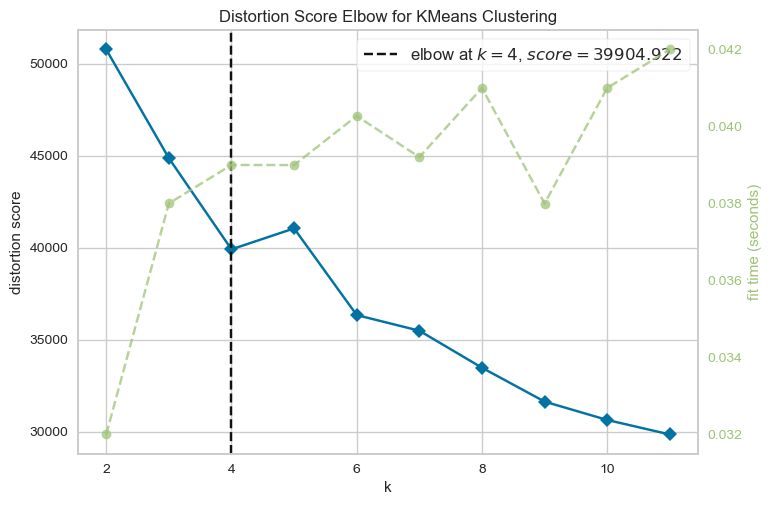

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
# set the model type to k-means
model = KMeans()

# generate an elbow plot for k = 2 to 12 clusters using the scaled data
visualizer = KElbowVisualizer(model, k=(2, 12))
visualizer.fit(df_scaled)
visualizer.show()

#Generate Clusters and Begin Profiling
- Evaluate cluster sizes
- Compute the mean of each input variable within each cluster

In [47]:
# Create an instance of KMeans with the desired value of k and fit to the scaled data
kmeans = KMeans(n_clusters=4, random_state=904)
kmclus=kmeans.fit(df_scaled)

clusters = kmeans.fit_predict(df_scaled)

#append cluster to original data
austin_df_clean['cluster']=clusters

austin_df_clean.info()

# Evaluate cluster sizes to insure that they are similar
print(austin_df_clean['cluster'].value_counts())

# Examine the means of each variable by cluster
df_desc = austin_df_clean.groupby('cluster').mean()
print(df_desc)

<class 'pandas.core.frame.DataFrame'>
Index: 2780 entries, 7 to 5830
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           2780 non-null   int64  
 1   host_response_rate(%)        2780 non-null   float64
 2   accommodates                 2780 non-null   int64  
 3   bathrooms                    2780 non-null   float64
 4   bedrooms                     2780 non-null   float64
 5   beds                         2780 non-null   float64
 6   price                        2780 non-null   float64
 7   availability_30              2780 non-null   int64  
 8   availability_60              2780 non-null   int64  
 9   availability_90              2780 non-null   int64  
 10  availability_365             2780 non-null   int64  
 11  number_of_reviews            2780 non-null   int64  
 12  review_scores_rating         2780 non-null   float64
 13  review_scores_accuracy 

# Profile Clusters
- The following code profiles the clusters for one variable
- You should repeat this for any variables of interest - This could include variables that stand out as being important in the preliminary cluster analysis OR this could be other variables (particularly categorical variables) that were not used to generate the cluster but are of interest from a business perspective.  For example, you may want to examine the distrubtion of customer churn within each of these clusters to determine whether certain clusters have a higher percentage of customers who churn (even though churn was not used as an input for creating the clusters)

Response Time


<Figure size 800x600 with 0 Axes>

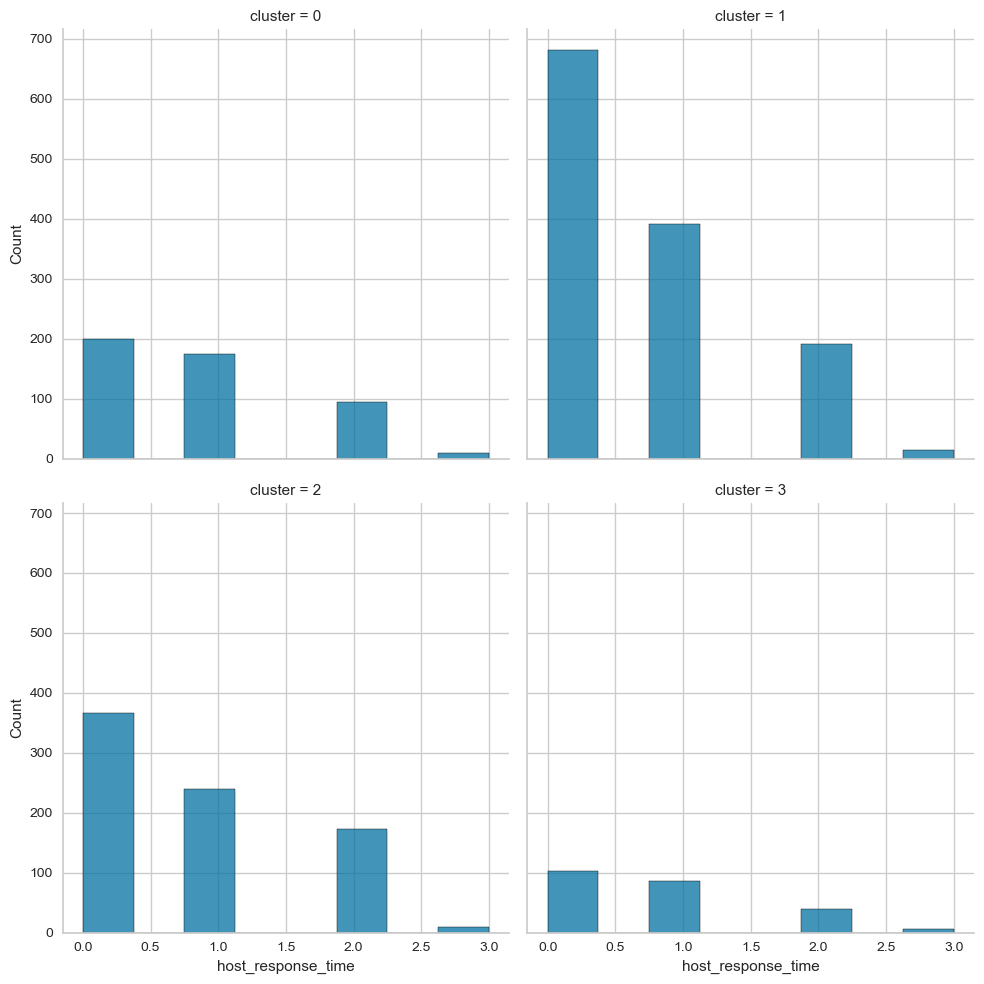

In [48]:
plt.figure(figsize=(8,6))
print("Response Time")
sns.displot(data=austin_df_clean, x="host_response_time", bins=8, col='cluster', col_wrap=2, common_bins=True)
plt.show()

In [49]:
dfprice = austin_df_clean[['price', 'cluster']]

df_desc1 = dfprice.groupby('cluster').describe()
print(df_desc1)

          price                                                           
          count        mean         std   min    25%    50%    75%     max
cluster                                                                   
0         479.0  533.331942  353.316416  14.0  288.5  450.0  680.0  2500.0
1        1280.0  138.251563   83.844158  14.0   80.0  120.0  175.0   800.0
2         787.0  168.542567  153.123199  20.0   80.0  125.0  200.0  2000.0
3         234.0  176.393162  171.619749  14.0   79.0  125.0  200.0  1120.0


In [50]:
dfreview = austin_df_clean[['review_scores_rating', 'cluster']]

df_desc2 = dfreview.groupby('cluster').describe()
print(df_desc2)

        review_scores_rating                                                 \
                       count       mean        std   min   25%   50%    75%   
cluster                                                                       
0                      479.0  97.052192   4.186973  80.0  95.0  99.0  100.0   
1                     1280.0  96.878125   3.536362  80.0  95.0  98.0  100.0   
2                      787.0  96.815756   4.402504  75.0  95.0  98.0  100.0   
3                      234.0  82.529915  11.535407  20.0  80.0  84.0   90.0   

                
           max  
cluster         
0        100.0  
1        100.0  
2        100.0  
3        100.0  


Number of Beds


<Figure size 800x600 with 0 Axes>

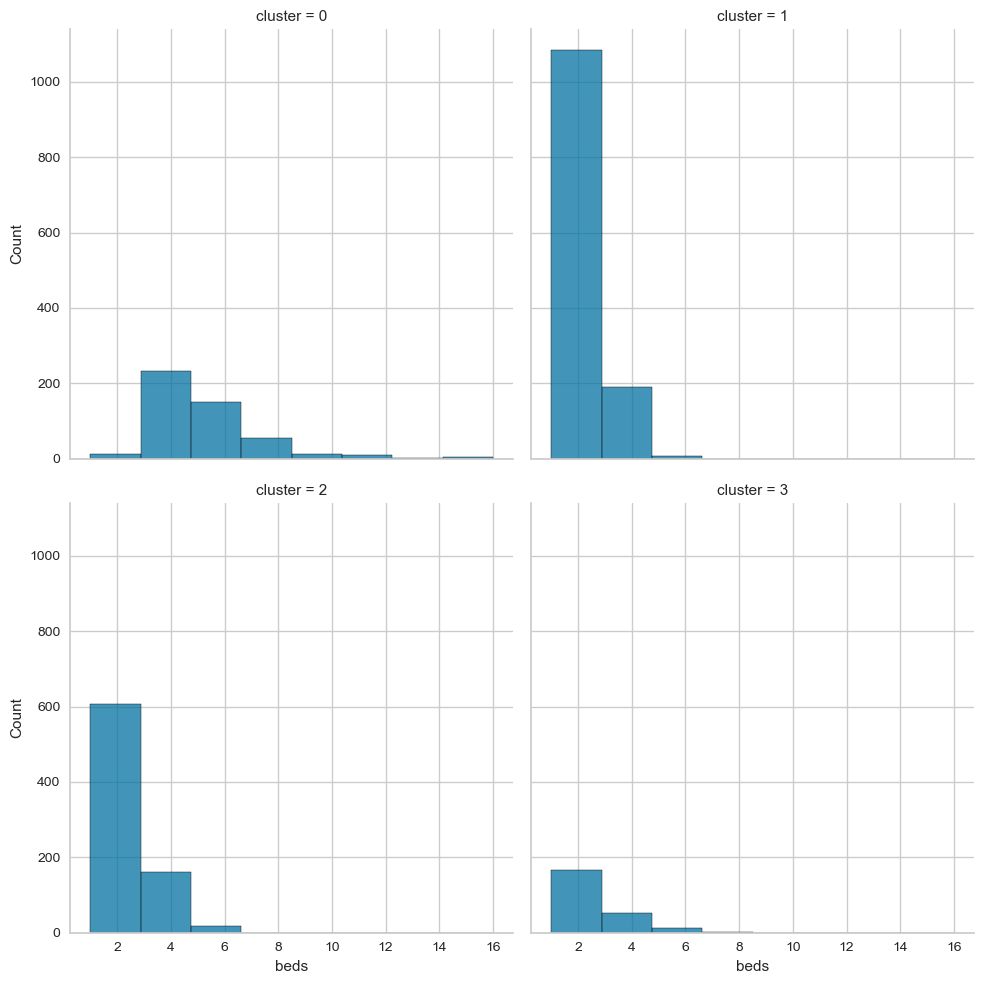

In [51]:
plt.figure(figsize=(8,6))
print("Number of Beds")
sns.displot(data=austin_df_clean, x="beds", bins=8, col='cluster', col_wrap=2, common_bins=True)
plt.show()

In [52]:
dfbeds = austin_df_clean[['beds', 'cluster']]

df_desc3 = dfbeds.groupby('cluster').describe()
print(df_desc1)
print(df_desc3)

          price                                                           
          count        mean         std   min    25%    50%    75%     max
cluster                                                                   
0         479.0  533.331942  353.316416  14.0  288.5  450.0  680.0  2500.0
1        1280.0  138.251563   83.844158  14.0   80.0  120.0  175.0   800.0
2         787.0  168.542567  153.123199  20.0   80.0  125.0  200.0  2000.0
3         234.0  176.393162  171.619749  14.0   79.0  125.0  200.0  1120.0
           beds                                              
          count      mean       std  min  25%  50%  75%   max
cluster                                                      
0         479.0  5.006263  2.275475  1.0  3.0  4.0  6.0  16.0
1        1280.0  1.639844  0.826159  1.0  1.0  1.0  2.0   6.0
2         787.0  1.860229  1.009261  1.0  1.0  2.0  2.0   6.0
3         234.0  2.094017  1.326410  1.0  1.0  2.0  3.0   7.0


Instantly Bookable


<Figure size 800x600 with 0 Axes>

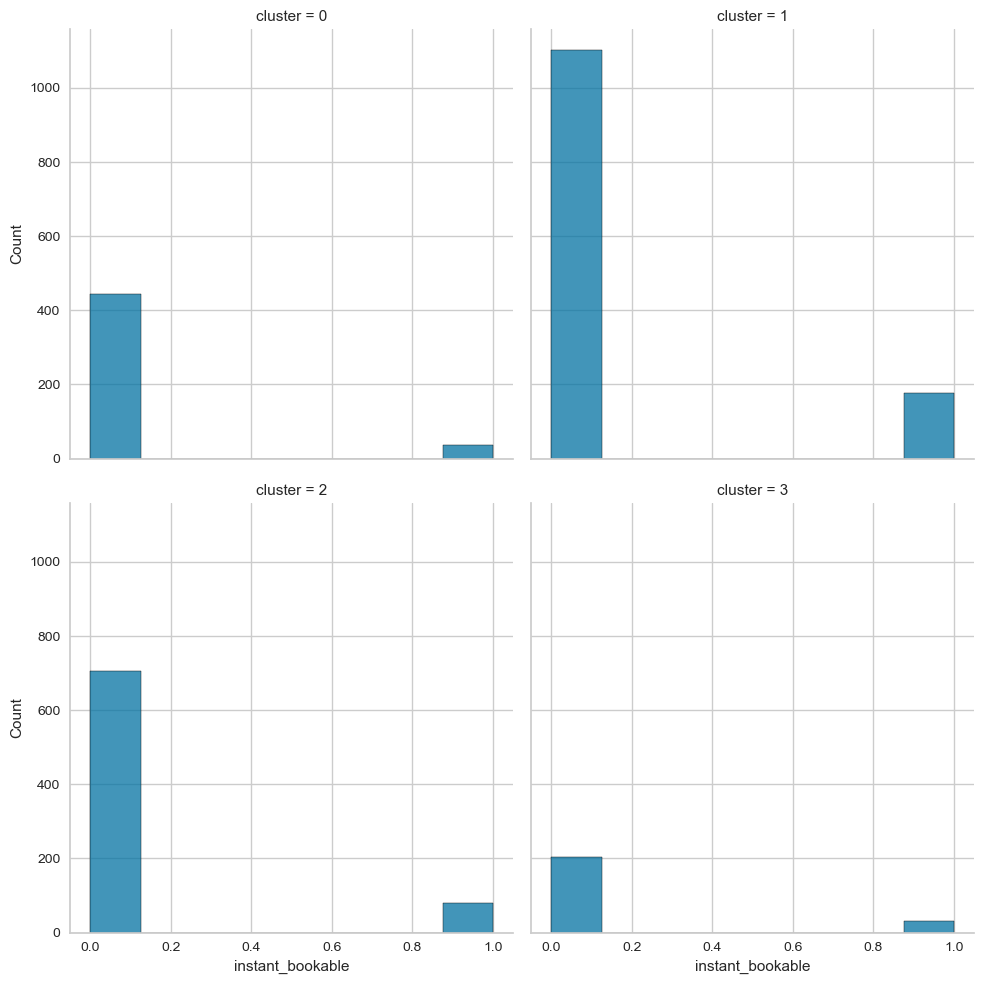

In [61]:
plt.figure(figsize=(8,6))
print("Instantly Bookable")
sns.displot(data=austin_df_clean, x="instant_bookable", bins=8, col='cluster', col_wrap=2, common_bins=True)
plt.show()

In [62]:
dfbook = austin_df_clean[['instant_bookable', 'cluster']]

df_desc4 = dfbook.groupby('cluster').describe()

print(df_desc4)

        instant_bookable                                             
                   count      mean       std  min  25%  50%  75%  max
cluster                                                              
0                  479.0  0.075157  0.263919  0.0  0.0  0.0  0.0  1.0
1                 1280.0  0.138281  0.345330  0.0  0.0  0.0  0.0  1.0
2                  787.0  0.101652  0.302382  0.0  0.0  0.0  0.0  1.0
3                  234.0  0.132479  0.339737  0.0  0.0  0.0  0.0  1.0


In [53]:
c0 = austin_df_clean[austin_df_clean['cluster'] == 0]
c1 = austin_df_clean[austin_df_clean['cluster'] == 1]
c2 = austin_df_clean[austin_df_clean['cluster'] == 2]
c3 = austin_df_clean[austin_df_clean['cluster'] == 3]

In [63]:
X0 = c0.drop(['instant_bookable', 'cluster'], axis=1)

y0 = c0['instant_bookable']
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=0.3, random_state=42)

X0_train.info()
y0_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 5255 to 1806
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_response_time           335 non-null    int64  
 1   host_response_rate(%)        335 non-null    float64
 2   accommodates                 335 non-null    int64  
 3   bathrooms                    335 non-null    float64
 4   bedrooms                     335 non-null    float64
 5   beds                         335 non-null    float64
 6   price                        335 non-null    float64
 7   availability_30              335 non-null    int64  
 8   availability_60              335 non-null    int64  
 9   availability_90              335 non-null    int64  
 10  availability_365             335 non-null    int64  
 11  number_of_reviews            335 non-null    int64  
 12  review_scores_rating         335 non-null    float64
 13  review_scores_accurac

In [64]:
dt = DecisionTreeClassifier(max_depth = 25, min_samples_leaf=10, ccp_alpha = 0.001)

# fit the model to the training data
dt.fit(X0_train, y0_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=25, min_samples_leaf=10)

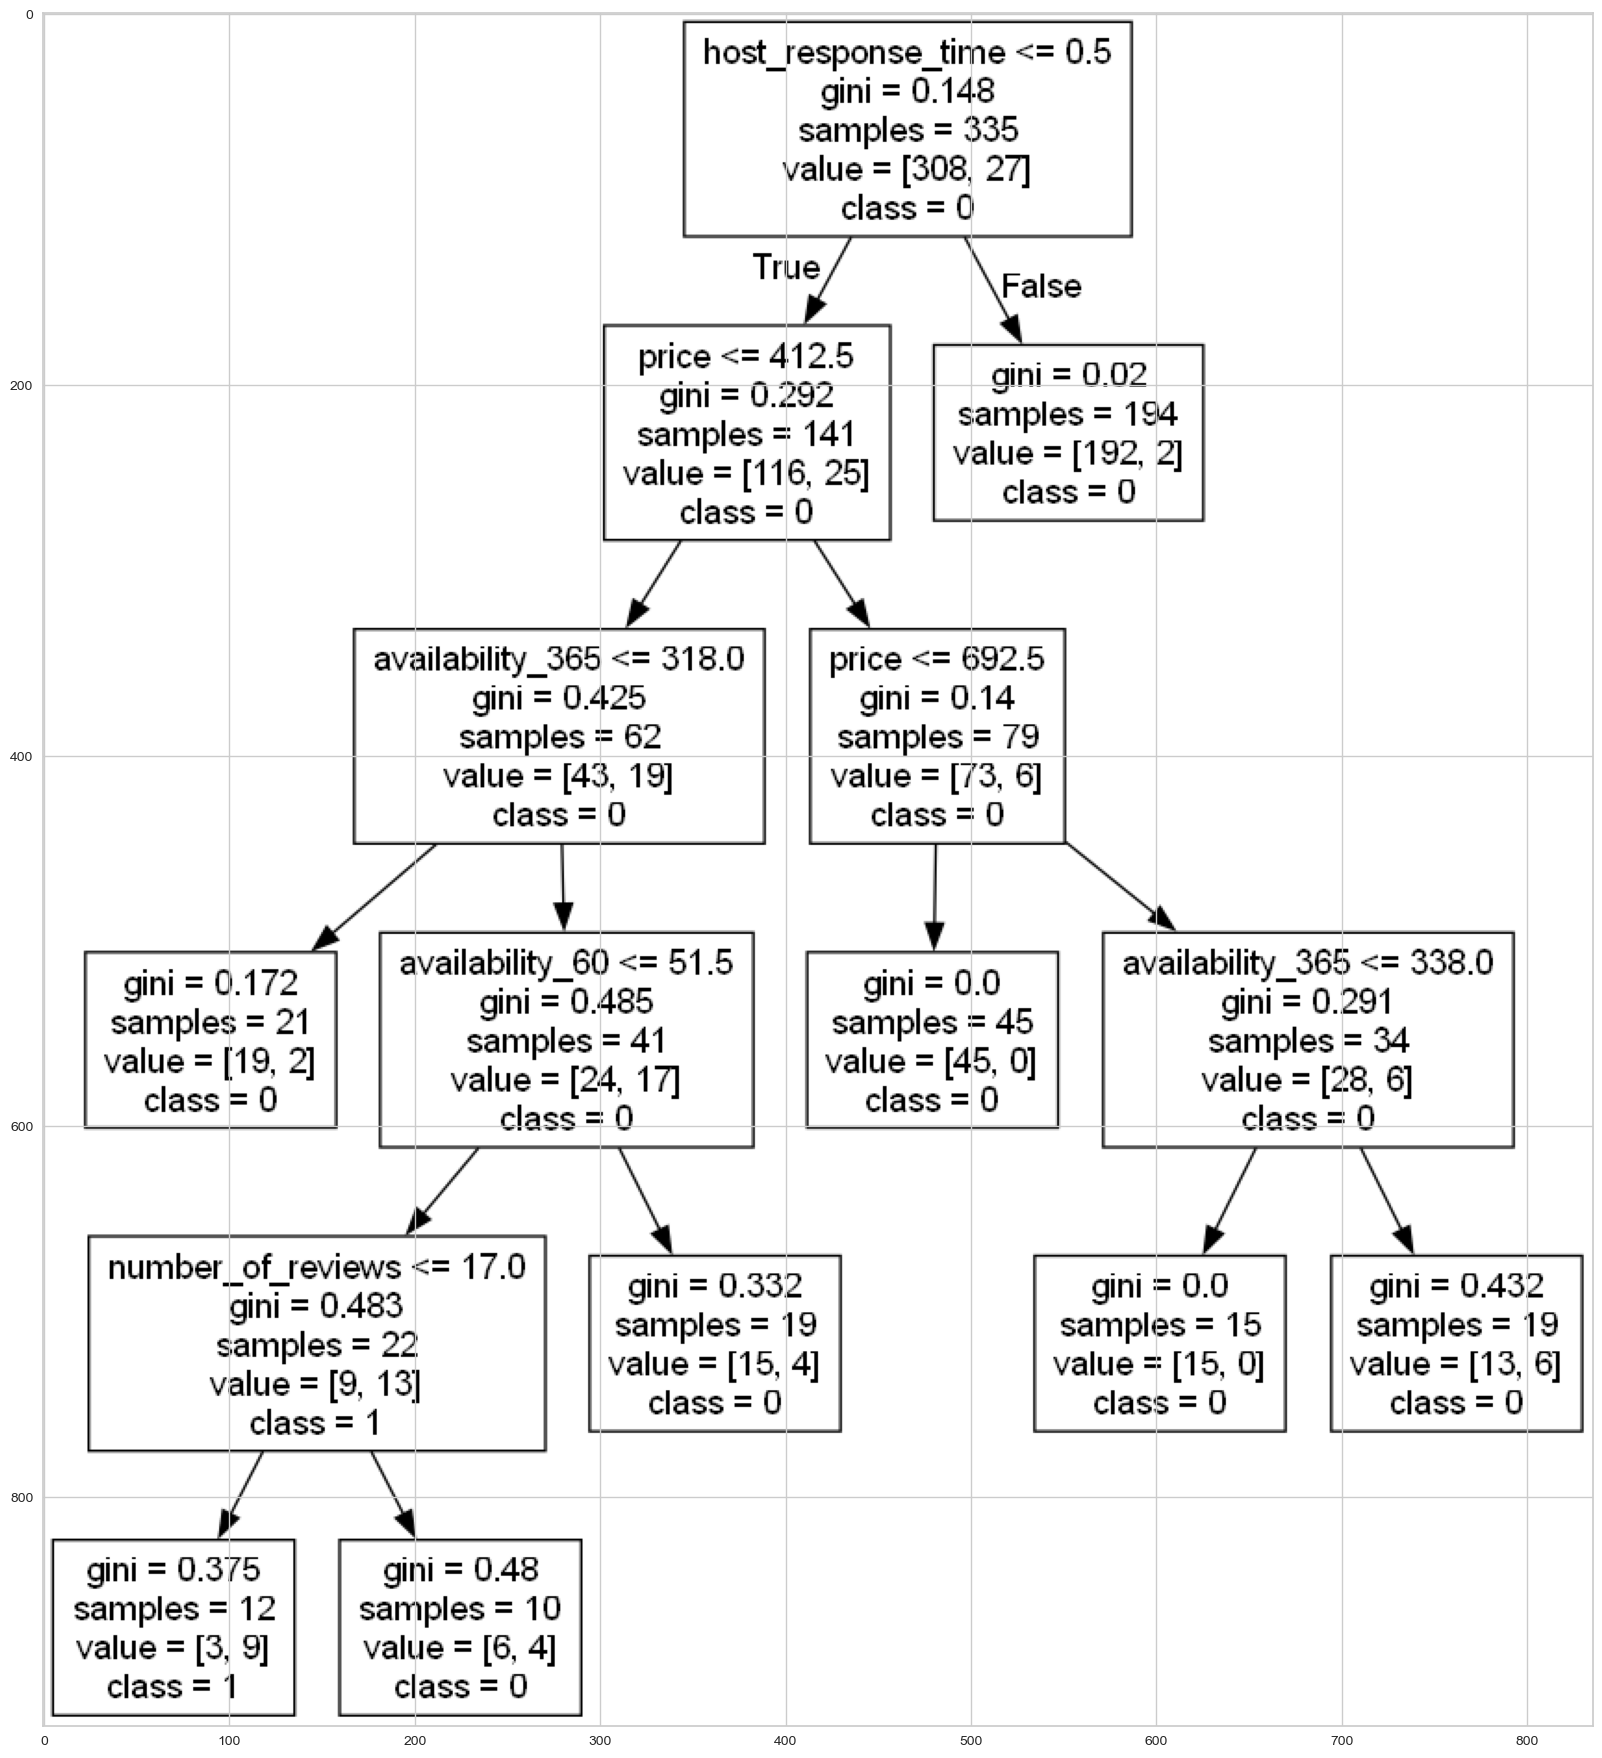

In [65]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
export_graphviz(dt,
                'tree.dot',
                class_names=['0','1'],
                feature_names = X0_train.columns)
! dot -Tpng tree.dot -o tree.png

import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (20, 40))
plt.imshow(img)

In [66]:
# make predictions on the training and test data
y0_pred_train = dt.predict(X0_train)
y0_pred_test = dt.predict(X0_test)

y0_prob_train = dt.predict_proba(X0_train)
y0_prob_test = dt.predict_proba(X0_test)

In [67]:
# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y0_train, y0_pred_train)
prec_train = precision_score(y0_train, y0_pred_train)
rec_train = recall_score(y0_train, y0_pred_train)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y0_test, y0_pred_test)
prec_test = precision_score(y0_test, y0_pred_test)
rec_test = recall_score(y0_test, y0_pred_test)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))

 -- train set -- 
Accuracy : 0.9373
Precision: 0.7500
Recall.  : 0.3333

 -- test set -- 
Accuracy : 0.9306
Precision: 0.3333
Recall.  : 0.1111
